<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Regina-Gas-Stations/blob/main/Regina_Gas_Station_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Regina Gas Stations Dataset**

![Image](https://economicdevelopmentregina.com/wp-content/uploads/2022/05/City-Skyline-Compressed-Keithe-Hershmiller-cropped-1.jpg)


## **Purpose**
I created this dataset to do some experiments and tell stories. I scraped every single data from the Google Maps manually. Although, this is a open source dataset, feel free to edit and update if you have any great suggestions. All the EDA tools and techniques will be applied on this data-set. Get exicited. 


## **Loading the Dataset**

First you need to upload the dataset to your Google Colab. Then you need to `read` it to your notebook as shown below. Since this is not a big dataset interms of having many rows. I stored them in a Excel Sheet. A simple way to store big data sets is to use CSV files (comma separated files).

CSV files contains plain text and is a well know format that can be read by everyone including Pandas. To read a CSV file you might want to use `pd.read_csv('data.csv')`. instead of `pd.read_excel` which is used for excel stored datasets.

In [6]:
import pandas as pd

# Reading the dataset
df = pd.read_excel('/content/Regina Gas Stations.xlsx')
df

,Name,Location,Phone Number
0,NaN,NaN,NaN
1,Mobil,Albert Street,306-790-1228
2,Esso,Albert Street,306-584-7185
3,Canadian Tire - Gas Plus,Albert Street,306-585-3319
4,Co-op Gas Bar,Albert Street,306-791-8890
...,...,...,...
64,Cowessess Gas,SK-33 Highway,306-359-6777
65,Petro Canada,Gravel Pit Road,306-525-6033
66,Petro Pass Regina,529 1 Ave E,306-721-6667
67,Co-op Gas Bar,Great Plains Road,306-791-5707


### **Printing the entire dataset**

If you wanted to print the entire dataset, then you can use the `to_string()` method. This will consume a lot of RAM but worth giving a try and know how it works. 

In [7]:
print(df.to_string())

                        Name               Location  Phone Number
0                        NaN                    NaN           NaN
1                      Mobil         Albert Street   306-790-1228
2                      Esso          Albert Street   306-584-7185
3   Canadian Tire - Gas Plus         Albert Street   306-585-3319
4              Co-op Gas Bar         Albert Street   306-791-8890
5                      Shell         Albert Street   306-586-4333
6              Petro Canada          Albert Street   306-585-1849
7                     Mobil               Broadway   306-569-0255
8             Co-op Gas Bar            Gordon Road   306-791-9388
9              Petro Canada          Albert Street   306-522-9112
10                     Esso          Albert Street   306-525-0414
11             Petro Canada        Victoria Avenue   306-352-4252
12            Race Trac Gas            Hill Avenue   306-586-5777
13              Fas Gas Plus            7th Avenue   306-569-3399
14        

---

## **Removing the empty row**

As you can see the first row has `NaN` values which means its not a number value. We need to remove it. 

```
DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

```

In [8]:
df = df.drop(0)
df

,Name,Location,Phone Number
1,Mobil,Albert Street,306-790-1228
2,Esso,Albert Street,306-584-7185
3,Canadian Tire - Gas Plus,Albert Street,306-585-3319
4,Co-op Gas Bar,Albert Street,306-791-8890
5,Shell,Albert Street,306-586-4333
...,...,...,...
64,Cowessess Gas,SK-33 Highway,306-359-6777
65,Petro Canada,Gravel Pit Road,306-525-6033
66,Petro Pass Regina,529 1 Ave E,306-721-6667
67,Co-op Gas Bar,Great Plains Road,306-791-5707


---

## **Information about the Data Frame**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 1 to 68
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          68 non-null     object
 1   Location      68 non-null     object
 2   Phone Number  68 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


What we can understand from this data is that there are **67 Gas Stations in Regina**. This excludes the first row that is the table header.

---

## **Key Error**

This can be a nightmare sometimes. It took me several hours to find the root cause of the problem. The column names had a white space appenede at the end. Remove this and your issue will be solved. 


In [14]:
# This is to check if any white space is appended to the column names
print(df.columns.tolist())

['Name', 'Location', 'Phone Number']


## **Counting occurrences of a specific value**

```
data['column_name'].value_counts()[value]
```

where

* data is the input dataframe
* value is the string/integer value present in the column to be counted
* column_name is the column in the dataframe



In [13]:
print(df['Location'].value_counts())

Albert Street            14
Rochdale Blvd             4
Prince of Wales Drive     4
Winnipeg Street           3
Victoria Avenue           3
McDonald Street           2
529 1 Ave E               2
Bucking Ham Drive         2
Great Plains Road         2
7th Avenue                2
Arcola Avenue             2
Pasqua Street             2
Saskatchewan Drive        2
Quance Street             1
Gravel Pit Road           1
SK-33 Highway             1
4415 Albert Street S      1
Gordon Road               1
Anaquod Road              1
8501 Dewdney Avenue       1
Pinkie Road               1
Ross Avenue               1
Hill Avenue               1
Chuka Blvd                1
Angus Street              1
310 McCarthy Bvld N       1
Halifax Street            1
Edward Street             1
McCarthy Bvld             1
Broadway                  1
180 Albert Street N       1
Truesdale Drive           1
4400 4 Ave                1
Fleet Street              1
Park Street               1
Dewdney Avenue      

---

## **Grouping Specific Column Data**

Grouping the column `Location`, this gives a count of the occurances. You call `.groupby()` and pass the name of the column that you want to group on, which is "Location". Then, you use `["Name"]` to specify the columns on which you want to perform the actual aggregation.

In [21]:
Location_count = df.groupby("Location")["Name"].count()
Location_count

Location
180 Albert Street N       1
310 McCarthy Bvld N       1
4400 4 Ave                1
4415 Albert Street S      1
529 1 Ave E               2
7th Avenue                2
8501 Dewdney Avenue       1
Albert Street            14
Anaquod Road              1
Angus Street              1
Arcola Avenue             2
Broadway                  1
Bucking Ham Drive         2
Chuka Blvd                1
Dewdney Avenue            1
Edward Street             1
Fleet Street              1
Gordon Road               1
Gravel Pit Road           1
Great Plains Road         2
Halifax Street            1
Hill Avenue               1
McCarthy Bvld             1
McDonald Street           2
Park Street               1
Pasqua Street             2
Pinkie Road               1
Prince of Wales Drive     4
Quance Street             1
Rochdale Blvd             4
Ross Avenue               1
SK-33 Highway             1
Saskatchewan Drive        2
Sherwood Drive            1
Truesdale Drive           1
Victoria Av

---

## **Plotting the Data**

For this we can use the pandas bar plot. A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.



<Axes: xlabel='Location'>

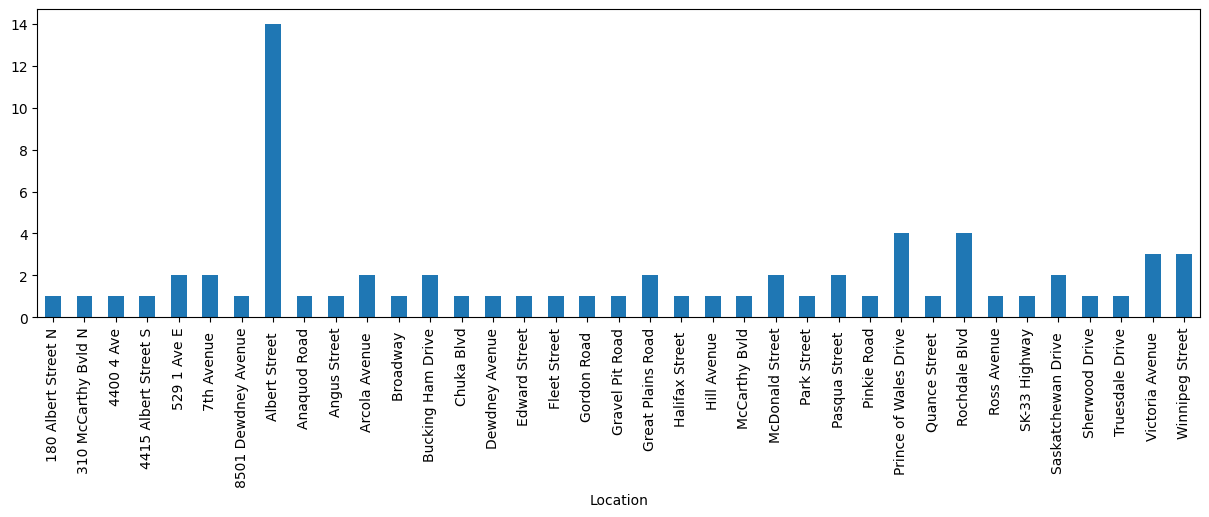

In [29]:
Location_count.plot.bar(stacked=True, figsize = (15, 4))